<h1 style="text-align : center"> <font color="red" size=8>VOTING ENSEMBLE</h1>

## <font color="dark blue">WHAT IS VOTING ENSEMBLE?
- Voting Ensemble is a Ensemble technique where we train multiple models (may be same models or different models).
- In the Prediction every model give their prediction. We take the the Majority Voting if it is Classification problem otherwise Average if it is Regression problem.

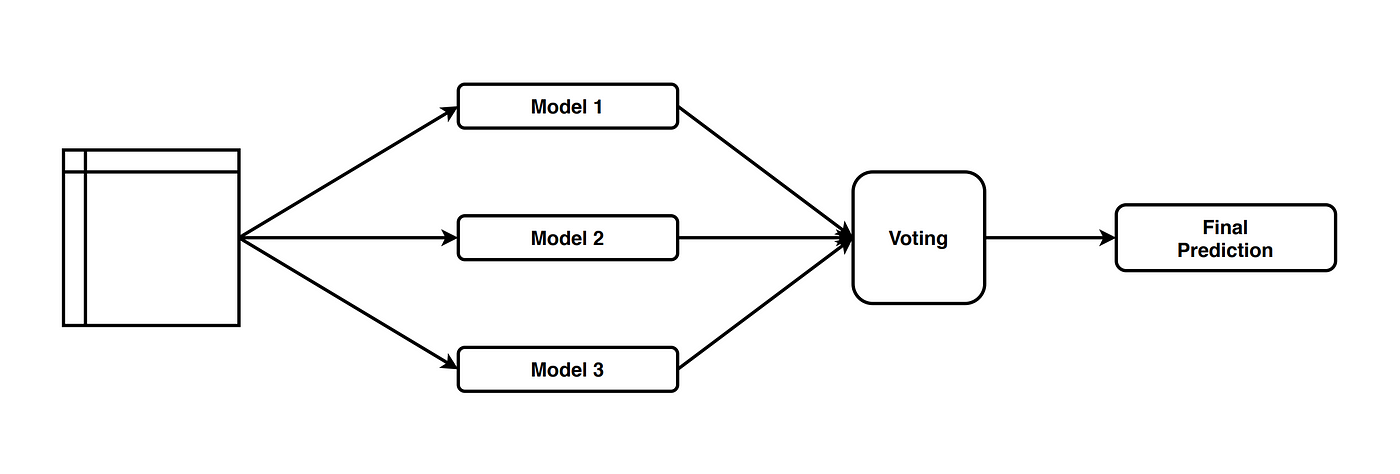

## <font color="dark blue">TYPES VOTING ENSEMBLE?
__1. HARD VOTING__:
- Each base model casts a vote for its predicted class.   
- The class with the most votes is chosen as the final prediction.   
- This method is simple and effective, especially when the base models have similar performance.

__2. SOFT VOTING__:
- Each base model assigns a probability to each class.   
- The probabilities from all models are averaged, and the class with the highest average probability is selected as the final prediction.   
- Soft voting can be more accurate than hard voting, especially when base models have different levels of confidence in their predictions

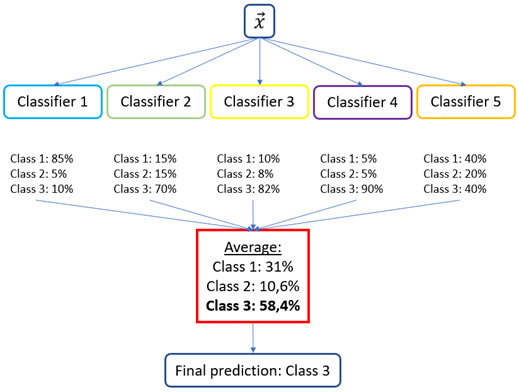

## <font color="blue">VOTING CLASSIFIER

In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [20]:
df=pd.read_csv(r"D:\DUDUL DS\CAMPUSX\ML\ENSEMBLE LEARNING\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# remove Id col
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# Label encode Species
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()

In [24]:
df['Species'] = encoder.fit_transform(df['Species'])

In [25]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [26]:
new_df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [27]:
new_df.shape

(100, 3)

In [28]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [30]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [31]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [32]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.72
knn 0.76


In [15]:
from sklearn.ensemble import VotingClassifier

## <font color="green">HARD VOTING

In [33]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


## <font color="green">SOFT VOTING

In [34]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


## <font color="green">CLASSIFIER WITH SAME ALGORITHM

In [35]:
from sklearn.svm import SVC

In [36]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [37]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


### 

## <font color="blue">VOTING REGRESSOR

In [38]:
from sklearn.datasets import load_boston

In [39]:
X,y = load_boston(return_X_y=True)

In [42]:
(X.shape), (y.shape)

((506, 13), (506,))

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [44]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
     

In [45]:
estimators = [('lr',lr),('dt',dt),('svr',svr)]

In [46]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))
     

lr 0.2
dt -0.18
svr -0.41


In [47]:
from sklearn.ensemble import VotingRegressor

In [48]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.43


In [49]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vr = VotingRegressor(estimators,weights=[i,j,k])
      scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
      print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(scores),2))

For i=1,j=1,k=1 0.44
For i=1,j=1,k=2 0.35
For i=1,j=1,k=3 0.27
For i=1,j=2,k=1 0.41
For i=1,j=2,k=2 0.41
For i=1,j=2,k=3 0.34
For i=1,j=3,k=1 0.35
For i=1,j=3,k=2 0.39
For i=1,j=3,k=3 0.37
For i=2,j=1,k=1 0.46
For i=2,j=1,k=2 0.43
For i=2,j=1,k=3 0.35
For i=2,j=2,k=1 0.44
For i=2,j=2,k=2 0.45
For i=2,j=2,k=3 0.41
For i=2,j=3,k=1 0.41
For i=2,j=3,k=2 0.44
For i=2,j=3,k=3 0.42
For i=3,j=1,k=1 0.44
For i=3,j=1,k=2 0.41
For i=3,j=1,k=3 0.39
For i=3,j=2,k=1 0.45
For i=3,j=2,k=2 0.46
For i=3,j=2,k=3 0.43
For i=3,j=3,k=1 0.42
For i=3,j=3,k=2 0.45
For i=3,j=3,k=3 0.43


## <font color="green">REGRESSOR WITH SAME ALGORITHM

In [50]:
# using the same algorithm

dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

In [51]:
estimators = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

In [52]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))
     

dt1 -0.85
dt2 -0.11
dt3 0.02
dt4 0.12
dt5 -0.03


In [53]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.18


## <font color="purple">PARAMETERS OF VOTING CLASS

__1. estimators__:
- A list of tuples, where each tuple contains a model name and the model object itself.
- For example: `[('rf', RandomForestClassifier()), ('svm', SVC())]`

__2. voting__:
- Determines how the predictions of the base models are combined.
> - __hard__: The majority vote is taken.
> - __soft__: The average predicted probabilities are used

__3. weights__:
- Optional weights assigned to each base model.
- Models with higher weights have more influence on the final prediction.

__4. n_jobs__:
- The number of CPU cores to use for parallel processing.
- A higher value can speed up training and prediction.

__5. flatten_transform__:
- Whether to flatten the output of the transform method of base estimators.
- This is usually set to `True`.


__6. verbose__:
- Controls the verbosity of the output.
- Setting it to True provides more detailed information during training and prediction.